In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import kendalltau

# Problem Statement and Data Description

Specific:

    - Deciding whether US or Asia is the best choice for job seeker in data science industry considering the salary, job distribution, remote-ratio, and living cost of index per country.

Measureable:

    - Using dataset based on 2023 data scientists salary
    - Comparing salary from US and Asia
    - Comparing job distribution from US and Asia
    - Analysis number of remote ratio based on selected countries
    - Comparing cost of living index on selected countries

Achievable:

    - Analysis was done in 1 week with the available dataset, including cost of living index as a supporting dataset

Relevant:

    - Assisting job seekers in making a choice about pursuing a career in the US or Asia, considering factors such as salary, job distribution, remote work ratio, and cost of living index.

    - Assisting businesses in determining whether the salary offered is competitive, if the number of job postings should be increased, and whether remote work is a feasible option for attracting international talent more effectively.

Time-bound:

    - Analysis done in 1 week
    
    - Dataset use from 2023 to keep the relevancy

Determining which region, the US or Asia, serves as the optimal option for individuals seeking work in the data science sector, taking into account factors such as salary levels, job distribution, remote work ratio, and country-specific living cost factors.

This analysis aims to comprehend the variations in salary distributions, job opportunities, and cost of living between the US and certain Asian countries. Our goal is to shed light on the question of whether increased salaries are warranted by the elevated living costs, and to help job seekers and employers make well-informed choices in light of this information.

As data science roles proliferate worldwide, job seekers frequently grapple with the choice between lucrative positions in areas such as the US and possibly easier-to-obtain jobs in Asia. However, the appeal of a job is influenced by more than just salary; market factors like living expenses, availability of jobs, and distribution of experience levels are essential components.

This analysis seeks to answer the following questions:

How do salaries compare between the US and selected Asian countries?
- Does the cost of living align with salary differences?
- How do experience levels affect salary distributions?
- What is the trend in remote vs. on-site job availability?

Dataset will be visualized mostly using bar chart and grouped bar chart. The analysis will be using Two-sampled Independent Test and for correlation using Spearman method.

5W+1H:

What is being analyzed in the comparison of data scientists in the US and Asia in 2023? What exactly is the factor being considered in this analysis?

Why is this analysis important for data science professionals and businesses? What are the potential benefits of understanding the differences between remote work and salary?

Where, exactly, is the primary focus of this analysis? Why are Asia and the US considered to be the primary comparison points?

When is this analysis being conducted? What dataset from the previous year is used to ensure data relevance?

How: What methodology is used in this analysis? What kind of source is used to compare salary and remote ratio.

Main Source:
- https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary/data

Supporting Source:
- https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024

# Data Loading

In [3]:
df = pd.read_csv('ds_salaries.csv')

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
duplicated_rows = df[df.duplicated()]
print('Number of duplicate rows: ', duplicated_rows.shape)

Number of duplicate rows:  (1171, 11)


In [7]:
df['work_year'].nunique()

4

In [8]:
df['experience_level'].nunique()

4

In [9]:
df['employment_type'].nunique()

4

In [10]:
df['job_title'].nunique()

93

In [11]:
df['salary'].nunique()

815

In [12]:
df['salary_currency'].nunique()

20

In [13]:
df['salary_in_usd'].nunique()

1035

In [14]:
df['employee_residence'].nunique()

78

In [15]:
df['remote_ratio'].nunique()

3

In [16]:
df['company_location'].nunique()

72

In [17]:
df['company_size'].nunique()

3

In [18]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021])

In [19]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [20]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [21]:
df['remote_ratio'].unique()

array([100,   0,  50])

In [22]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [23]:
df['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

This dataset concerns global salaries of data scientists in 2023. according to the data exploration we conducted, our initial dataset consists of 3755 rows and 11 columns. the 11 columns include work year, experience level, employment type, job title, salary, salary currency, salary in USD, employee residence, remote ratio, company location, and company size.

Every dataset contains 0 missing values, the number of duplicated rows is 1171, work year has 4 unique values (2020, 2021, 2022, 2023), and experience level has 4 unique values (EN - Entry-level; MI - Mid-level; SE - Senior-level, and EX - Executive), employment type have 4 unique value (FT - Full Time; CT – Contract; FL - Freelance; and PT - Part Time), job titles have 93 unique values, salary currencies have 20 unique values, employee residences have 78 unique values, company locations have 72 unique values, remote ratios have 3 unique values (100 - fully remote; 50 – hybrid; 0 - on-site)

As the data contains no missing values, the remote ratio column shows 0. However, this indicates that the job was performed onsite rather than remote or hybrid.  Data cleaning is unnecessary because the data was already clean.

# Exploration and Analysis

I'm going to filter the countries to simplify and condense our analysis.  I wanted to restrict the data to just two regions—North America (US) and Asia—despite the fact that it was collected globally.  We have the United States as the only nation in North America and China, Hong Kong, Indonesia, India, Japan, Malaysia, the Philippines, Pakistan, Singapore, Thailand, and Vietnam as the ten nations in Asia.


In [24]:
# define country groups
us_countries = ['US']
asia_countries = ['CN', 'HK', 'ID', 'IN', 'JP', 'MY', 'PH', 'PK', 'SG', 'TH', 'VN']

# filter for US and Asia region
df_filtered = df[df['company_location'].isin(us_countries + asia_countries)]

df_filtered.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [25]:
mean_salary_in_usd = df_filtered['salary_in_usd'].mean()
print(f'average salary in usd: {mean_salary_in_usd:.2f}')

average salary in usd: 148777.81


In [26]:
median_salary_in_usd = df_filtered['salary_in_usd'].median()
print(f'median salary in usd: {median_salary_in_usd:.2f}')

median salary in usd: 144000.00


The average and median salary (USD) are 148777.81 and 144000.00. Since the mean is slightly higher than median, it suggests that there are some high salaries pulling up the average (likely executive or highly specialized role). The fact that US dominate the whole dataset also affected that the dataset is slightly skewed to the right.

For Companies:

    - They should make a decision rely on the median rather than mean when setting salary ranges, as it better to represents what most employees earn without being skewed by extreme. But disclaimer, this data potentially have an outlier due how high the number of dataset from US. Companies outside of US need to check the median salary in Asia region.

    - Companies need to have a competitive hiring strategy if they want to attract top talent. Companies must stay competitive with high-end salaries while ensuring a fair pay distribution.

For Job seeker:

    - Median salary represents what a typical data science earns, meaning many salary fall around this range than the inflated mean

    - Mean being slightly higher than median implies that majority of people earn salary around the median, but some roles pay significantly more, due to its how competitive the tech scene, company size, and region.

    - Job seekers should consider which industries and skill sets are driving higher salaries and position themselves accordingly for those opportunities. Also they need to consider other things such as language, living cost, etc.


In [27]:
# calculate median and mean salary
salary_summary = df_filtered.groupby('company_location')['salary_in_usd'].agg(['median', 'mean']).reset_index()
print(salary_summary)

   company_location    median           mean
0                CN  100000.0  100000.000000
1                HK   65062.0   65062.000000
2                ID   34208.0   34208.000000
3                IN   18276.0   30197.741379
4                JP   75682.0  114127.333333
5                MY   40000.0   40000.000000
6                PH   50000.0   50000.000000
7                PK   16000.0   20000.000000
8                SG   66113.5   53675.000000
9                TH   24740.0   23064.333333
10               US  145000.0  151822.009539
11               VN   12000.0   12000.000000


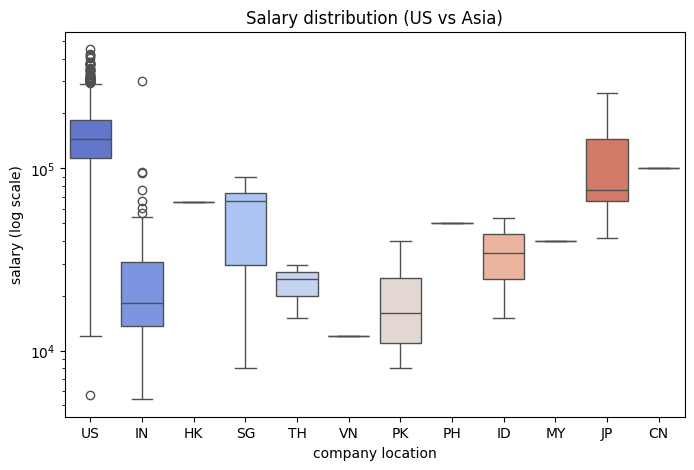

In [28]:
# salary distribution plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x='company_location', y='salary_in_usd', hue='company_location', palette='coolwarm', legend=False)
plt.yscale('log')
plt.title('Salary distribution (US vs Asia)')
plt.xlabel('company location')
plt.ylabel('salary (log scale)')
plt.show()

In [29]:
fig = px.box(df_filtered, x='company_location', y='salary_in_usd')
fig.show()

The analysis of salary distribution identifies significant regional variations.  The highest salaries are found in the United States, where the upper limit salary is 291,500 and the maximum is 450,000.  Even if there are severe outliers, they probably represent how developed the US IT sector is, with senior and executive-level employees earning much more money.  In comparison, India has a 300,000 salary maximum, but the upper limit is only 54,094, suggesting that high incomes are uncommon and frequently associated with leadership positions or specialized knowledge.

In contrast, salary distributions in Singapore, Thailand, Pakistan, Indonesia, and Japan are more consistent, with few outliers and earnings staying within established ranges.  This gives job searchers a clearer expectation.  However, it is challenging to make inferences about China, Malaysia, the Philippines, Hong Kong, and Vietnam because we do not have enough data on these areas.  Although the US continues to be the most profitable market, the results show that Asian nations provide steady employment opportunities with different pay scales and cost of living factors.


### When

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3596\860384063.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




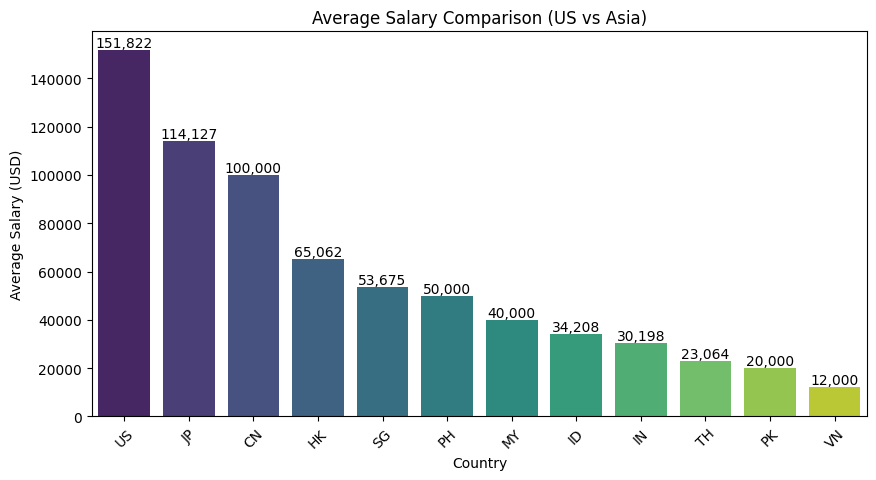

In [30]:
# average salary comparison

avg_salary = df_filtered.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=avg_salary.index, y=avg_salary.values, palette='viridis', legend=False)

plt.title('Average Salary Comparison (US vs Asia)')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)

# add annotation
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )


plt.show()

Based on the bar chart for average salary comparison North America (US) vs Asia, we found an information that US leading the chart by having 151,822 average salary (USD). This is not a surprise considering how mature tech industry in the United States. Followed by Japan with 114,127 and China coming close with 100,000. Once again, we are not surprise with Japan and China coming in number two and three. Japan and China known for their advanced technology way above the rest of the world. We could see the gap between these three and the rest of the country are big when it comes to average salary.

How about the job distribution? Having a high average salary doesn't always telling you that the job distribution was linear. Because you can't measure average salary with high job distribution.

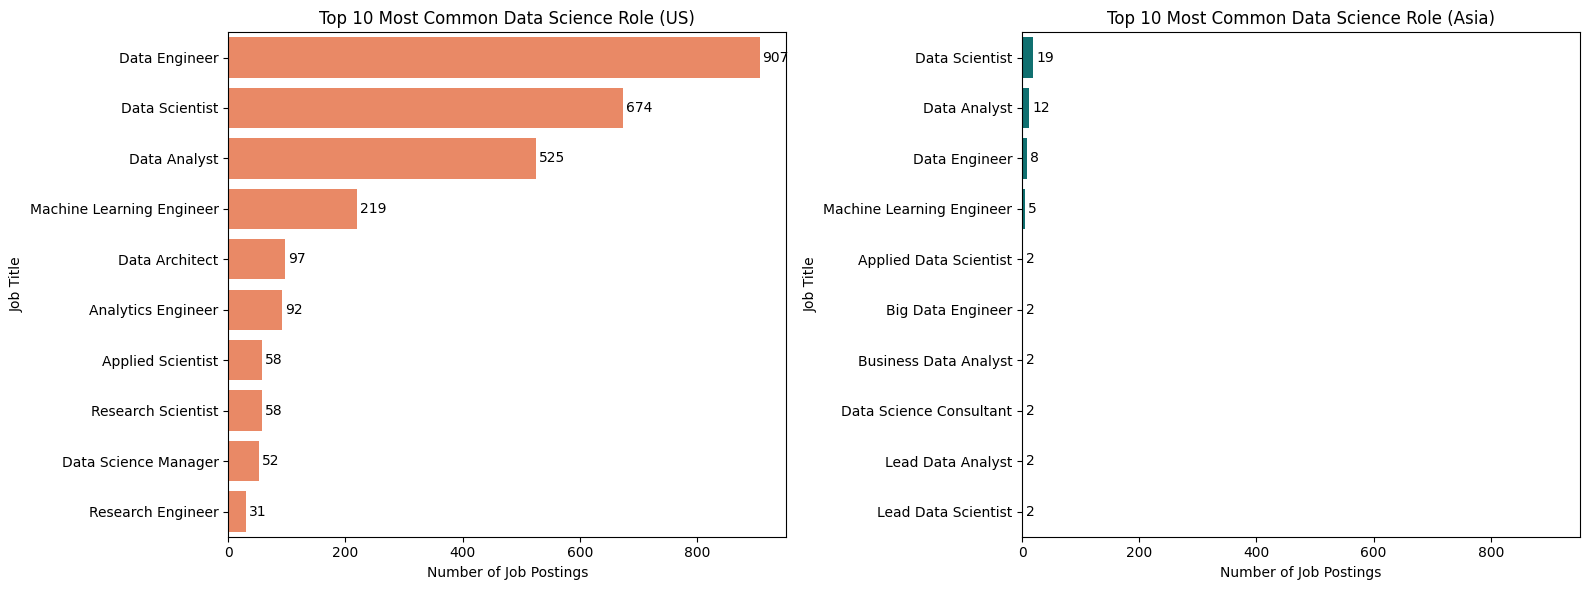

In [31]:
# job role distribution

# group by job title and count occurences
job_counts = df_filtered.groupby(['company_location', 'job_title']).size().reset_index(name='count')

# separate US and Asia
us_jobs = job_counts[job_counts['company_location'].isin(us_countries)]
asia_jobs = job_counts[job_counts['company_location'].isin(asia_countries)]

# get top 10 most common roles in each country
top_us = us_jobs.nlargest(10, 'count')
top_asia = asia_jobs.groupby('job_title')['count'].sum().reset_index().nlargest(10, 'count')

# side by side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# US plot
sns.barplot(data=top_us, x='count', y='job_title', ax=axes[0], color='coral')
axes[0].set_title('Top 10 Most Common Data Science Role (US)')
axes[0].set_xlabel('Number of Job Postings')
axes[0].set_ylabel('Job Title')

# Asia plot
sns.barplot(data=top_asia, x='count',  y='job_title', ax=axes[1], color='teal')
axes[1].set_title('Top 10 Most Common Data Science Role (Asia)')
axes[1].set_xlabel('Number of Job Postings')
axes[1].set_ylabel('Job Title')



# add annotation text inside bars
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(
            width + 5,
            p.get_y() + p.get_height() / 2,
            int(width),
            ha='left', va='center', fontsize=10, color='black')
    
plt.tight_layout()
plt.show()

We are going find the top 10 most common Data Science role in US and Asia. Once again, United States has a lot of job distribution compare to Asia. Data engineer leading the chart with 907, Data Scientist 674, and Data Analyst 525. Based on this information, we could say that a Data Science role are pretty common in United States. Which means, a lot of company need these people to have in their company. With how absurd the number, its safe to say that these 3 roles was needed that much. Considering that United States has a really mature industry compared with Asia, especially with the surge of startup company and FAANG (Facebook, Apple, Amazon, Netflix, and Google), safe to say that Data Science role was a good place for job-seeker to go there. Obviously with how high the number of job postings, it means job seeker need to hone their skills because the competition are really high.

Asia, on other hand, having a really low number compare to United States. Even with 10 countries combine together, the number of job postings in Asia are really low. This means, data science field was new and looking to growth more. Data Science lead the numeber with 19 job of postings, Data Analyst 12 job of postings, and Data Engineer 8 job of postings. We could argue that in Asia, Data Science role was a new thing in this industry, and companies expecting people that apply as Data Science to be really good skill wise. If we compare between US and Asia, the spread between these 3 roles are way different. In United States, the spread was pretty even. Which means, they are able to focus on their own task, like Data Engineering doing their own parts, Data Analyst doing their own parts, etc. They could pull that off because how big the industry compared with Asia. Thats why its really low in Asia because Data Science was a "new" job and they needed people who are specialised in this to be able to get hired.

<Figure size 1400x600 with 0 Axes>

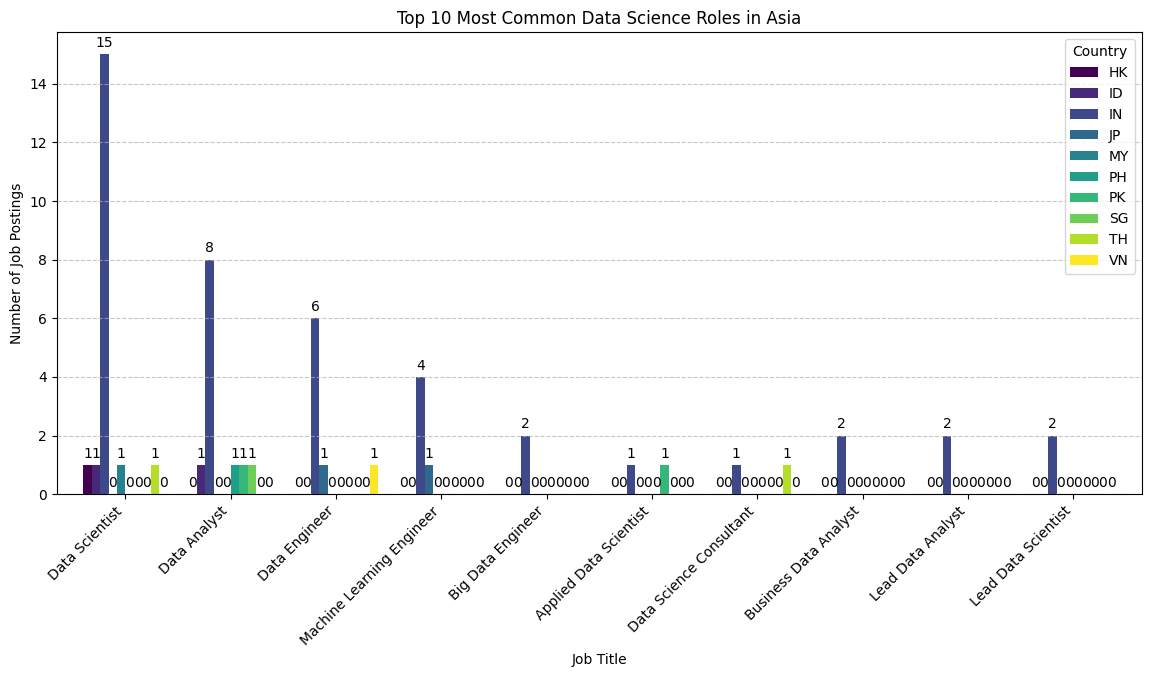

In [32]:
# breakdown each asia country

# filter asia country
df_asia = df_filtered[df_filtered['company_location'].isin(asia_countries)]

# count job occurences per country
job_counts_asia = df_asia.groupby(['company_location', 'job_title']).size().reset_index(name='count')

# top 10 job per country
top_10_asia = job_counts_asia.groupby('job_title')['count'].sum().nlargest(10).index

# filter to keep only 10 job titles
top_roles_asia = job_counts_asia[job_counts_asia['job_title'].isin(top_10_asia)]

# pivot data for a grouped bar chart
pivot_top_roles = top_roles_asia.pivot(index='job_title', columns='company_location', values='count',).fillna(0)


# sort job based on total postings
pivot_top_roles = pivot_top_roles.loc[pivot_top_roles.sum(axis=1).sort_values(ascending=False).index]

# plot grouped bar chart
plt.figure(figsize=(14, 6))
pivot_top_roles.plot(kind='bar', width=0.8, figsize=(14, 6), colormap='viridis')

plt.title('Top 10 Most Common Data Science Roles in Asia')
plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', loc='upper right')

# add annotations on bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Earlier, we know that based on average salary Japan and China are top of leaderboard. But surprisingly, India was the one who leading the chat with 15 number of job postings for Data Scientist. In fact, India leading every chart compared to rest of asian countries. India are known for being a powerhouse when it comes to technology. High number of people from India in tech company was a proof why this country leading by mile when it comes to technology, even compare to Japan. I think its safe to say that despite Japan, China, and Singapore arguably have a better technology in general compared to India, but when it comes to the engineer, India miles ahead those three. Also keep in mind that India was an english speaking country unlike Japan or China. Their large of talent pool and ability to speak english well compared to Japan and China could means India will continue dominate the IT market from Asia.

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3596\1445251515.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




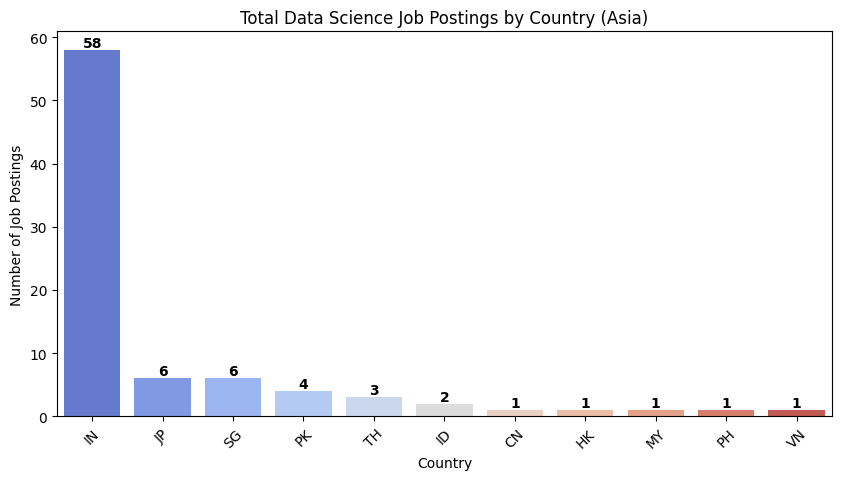

In [33]:
# Total job postings per country in Asia
total_jobs_per_country = df_filtered[df_filtered['company_location'].isin(asia_countries)] \
    .groupby('company_location', dropna=False)['job_title'].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=total_jobs_per_country.index, y=total_jobs_per_country.values, palette='coolwarm')

# Add annotations inside bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to int for cleaner display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.title('Total Data Science Job Postings by Country (Asia)')
plt.xlabel('Country')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

Data science is a rapidly growing field with various specializations, including data engineering, machine learning, and applied statistics. As demand for data professionals rises globally, job postings provide a useful indicator of a country’s role in the industry.

Based on the data, India dominates the job market in Asia, with 58 job postings—far surpassing any other country. The closest competitors, Japan and Singapore, only have 6 job postings each. This highlights India's strong presence in IT and data-related fields, making it a regional leader.

Interestingly, despite Japan having a higher average salary than India, it has significantly fewer job postings. Given Japan’s reputation for technological advancement, this low number is surprising. One possible explanation is that Japan’s AI and machine learning industry may already be well-established, leading to fewer open positions. A deeper analysis could explore whether Japan’s AI sector is more developed than India's despite the disparity in job listings.

<Figure size 1200x600 with 0 Axes>

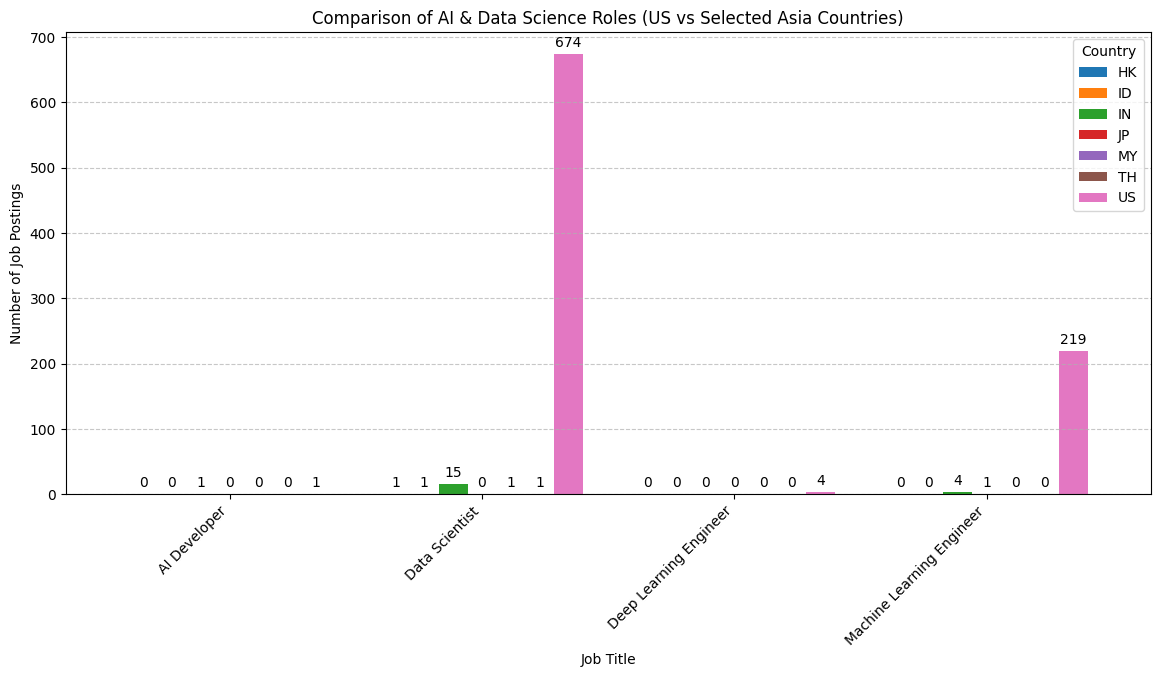

In [ ]:
# filter AI-related jobs
ai_roles = ['Machine Learning Engineer', 'AI Developer', 'Data Scientist', 'Deep Learning Engineer']
df_ai = df_filtered[df_filtered['job_title'].isin(ai_roles)]

# job posting trends by country
ai_job_counts = df_ai.groupby(['company_location', 'job_title']).size().reset_index(name='count')

# pivot data for grouped bar chart
pivot_ai_jobs = ai_job_counts.pivot(index='job_title', columns='company_location',values='count').fillna(0)

# plotting job trends
plt.figure(figsize=(12, 6))
ax = pivot_ai_jobs.plot(kind='bar', stacked=False, figsize=(14, 6), width=0.8)

plt.title("Comparison of AI & Data Science Roles (US vs Selected Asia Countries)")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.show()

To further investigate Japan’s role in AI-related jobs, we analyzed job postings for AI Developer, Data Scientist, Deep Learning Engineer, and Machine Learning Engineer. Surprisingly, Japan only has 1 AI Developer job posting, while India leads with 15 Data Scientist and 4 Machine Learning Engineer positions.

This suggests that, despite Japan’s reputation in AI and machine learning, it may not be actively hiring for these roles at the same scale as India. One possible reason could be that Japan’s AI industry is already well-established, with a preference for internal talent rather than external hiring. Meanwhile, India's rapidly growing tech sector and startup ecosystem continue to drive high demand for AI professionals.

<Figure size 1000x500 with 0 Axes>

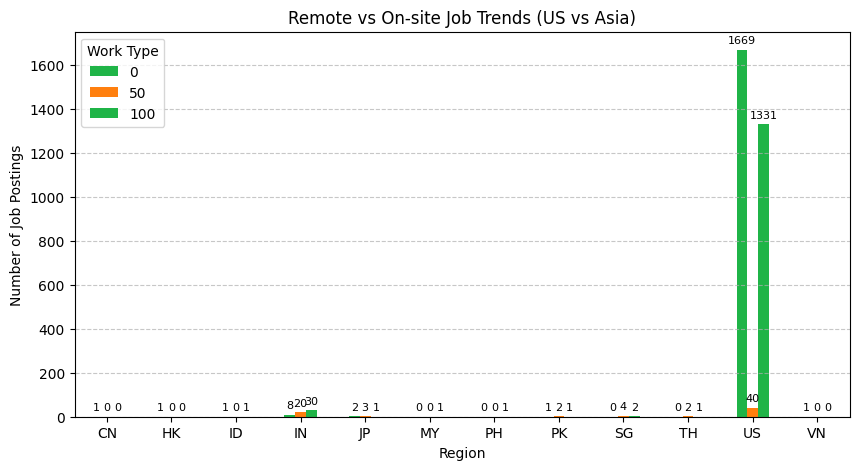

In [35]:
# classify jobs as remote or on-site (exclude hybrid)
df['remote_ratio'] = df_filtered['remote_ratio'].apply(lambda x: 'Remote' if x == 100 else 'On-site')

# count occurences of each work in US and Asia
remote_trends = df_filtered.groupby(['company_location', 'remote_ratio']).size().reset_index(name='count')

# pivot data for grouped bar chart
pivot_df = remote_trends.pivot(index='company_location', columns='remote_ratio', values='count').fillna(0)

# plotting
plt.figure(figsize=(10, 5))
ax = pivot_df.plot(kind='bar', stacked=False, color=['#1fb447', '#ff7f0e'], figsize=(10, 5))

plt.title('Remote vs On-site Job Trends (US vs Asia)')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.legend(title='Work Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3)

plt.show()



The US has an overwhelmingly higher number of remote job postings compared to Asian countries. In contrast, the majority of job postings in Asia are on-site, with only a small fraction offering remote opportunities.

This significant difference can be attributed to several key factors. The US job market has long embraced remote work, especially after the COVID-19 pandemic, which accelerated the adoption of flexible work arrangements. Many US-based companies, particularly in the tech industry, have established robust infrastructure and policies that support remote work, allowing them to tap into a global talent pool while reducing operational costs.

On the other hand, Asia still largely favors on-site work, possibly due to cultural norms, industry requirements, and company policies. Many businesses in Asia prioritize in-office collaboration, structured work environments, and direct supervision, which are deeply embedded in traditional corporate structures. Furthermore, some Asian countries may face logistical and regulatory challenges that make full-scale remote work adoption more difficult.

This trend suggests that while remote work is becoming increasingly common worldwide, its adoption rate varies significantly by region. Companies hiring in the Asian market may need to reassess their work policies if they want to attract top talent who prioritize flexibility, while job seekers looking for remote opportunities might find more options in the US than in Asia.

<Figure size 1000x500 with 0 Axes>

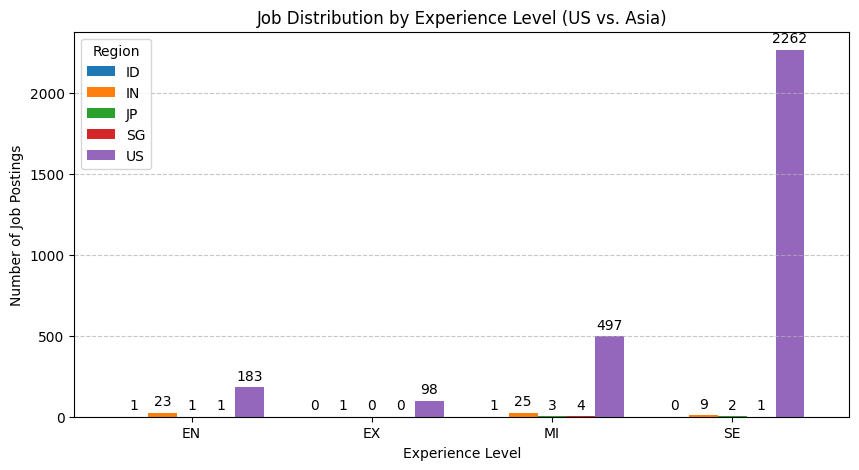

In [36]:
# filter relevant data
experience_levels = ['EN', 'MI', 'SE', 'EX']
target_countries = ['US', 'JP', 'ID', 'IN', 'SG'] # US plus 4 Asia countries who are big in terms of job distribution

# filter data
df_filtered = df[(df['experience_level'].isin(experience_levels)) & (df['company_location'].isin(target_countries))] 

# job distribution by exp level (us vs asia)
job_counts = df_filtered.groupby(['company_location', 'experience_level']).size().reset_index(name='count')

# pivot data for grouped bar chart
pivot_jobs= job_counts.pivot(index='experience_level', columns='company_location', values='count').fillna(0)

# plot job distribution by exp level (us vs asia)
plt.figure(figsize=(10, 5))
ax = pivot_jobs.plot(kind='bar', stacked=False, figsize=(10, 5), width=0.8)


plt.title("Job Distribution by Experience Level (US vs. Asia)")
plt.xlabel("Experience Level")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.show()

From the graph comparing job distribution by experience level in the US and Asia, we can see that the US job market is more mature than its Asian counterpart. This is evident in the numbers: 183 Entry-level jobs, 98 Executive-level jobs, 497 Mid-level jobs, and 2,262 Senior-level jobs.

This supports our earlier claim that data science-related roles are more established in the US compared to Asia. Companies in the US prioritize hiring senior professionals because they possess stronger experience, specialized skills, and better decision-making abilities than entry-level candidates.

Furthermore, with thousands (or even millions) of startups in the US, competition is intense. To stay ahead, companies naturally aim to hire the best talent available, further driving the demand for senior-level professionals.

In [37]:
# df_lc_index = living cost index
df_lc_index = pd.read_csv('index_living_cost.csv')

df_lc_index.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


After analyzing salary distribution, job postings, and job distribution across the selected countries, the next logical step is to examine the cost of living index. By comparing the average salary with the cost of living in each country, we can assess whether salary levels align proportionally with living expenses. This analysis aims to provide deeper insights into the economic feasibility of working in different regions, focusing on the United States, Indonesia, India, Japan, and Singapore.

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3596\852780528.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




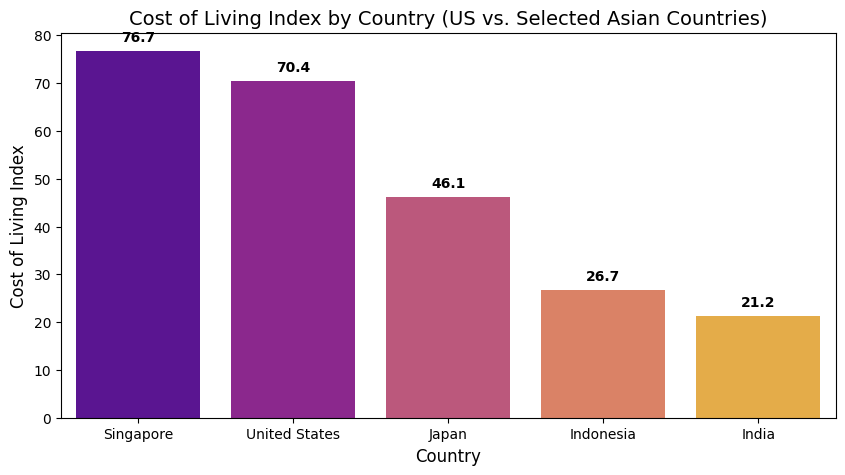

In [38]:
# selected country for living cost index
selected_index = ['United States', 'Singapore', 'Indonesia', 'Japan', 'India']

# filter country index
df_index = df_lc_index[df_lc_index['Country'].isin(selected_index)]

# plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_index, x='Country', y='Cost of Living Index', palette='plasma')

plt.title("Cost of Living Index by Country (US vs. Selected Asian Countries)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Cost of Living Index", fontsize=12)
plt.xticks(rotation=0)



for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()

Based on 2014 data, the cost of living index for Singapore, the United States, Japan, Indonesia, and India (in descending order) was 76.7, 70.4, 46.1, 26.7, and 21.2, respectively. Despite having the highest cost of living, Singapore's average salary remains lower than that of the United States. This suggests that while living expenses in Singapore are exceptionally high, salary levels may not fully compensate for the increased cost, potentially impacting overall purchasing power and affordability.

For job seekers who considering an opportunity globally, North America and Asia present two distinct career path:
    
    - North America: Offers higher salaries and strong career growth opportunities compared to Asian countries. But the competition is really intense, and securing a job in American startup often requires exceptional skills, work experiences, and different culture could affect some people. We also noted that while the average salary is the highest, the cost of living is also high. Expenses can offset the financial benefits.

    - Asia (Indonesia, India, Japan, Singapore): Salaries are generally lower than United States, but when we compare the cost of living, some countries provide a comfortable standard of living. If some people find that Singapore living cost are way too high, they can always consider moving to Japan since the living cost are way lower than Singapore, and the average salaries are way higher than Singapore. Also the general knowledge that some people prefer Japan as their favorite destination since they have better infrastructure, public transport, and quality of life compare to countries such as Indonesia and India.

Ultimately, the choice depends on personal career goals. Whether prioritizing high salaries and career progression in United States or leveraging Asia's growing industries, lower competition, and potential for career development in emerging markets.

In [ ]:
# encode experience levels as ordinal values
exp_order = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}  # revert the format EN as 1, MI as 2, and so on 
df_filtered.loc[:, 'exp_numeric'] = df_filtered['experience_level'].map(exp_order)

# compute Spearman correlation
corr, p_val = kendalltau(df_filtered['exp_numeric'], df_filtered['salary_in_usd'])

print(f'Kendall’s Tau Correlation: {corr:.2f}')
print(f'P-value: {p_val:.2f}')

# hypothesis testing
if p_val < 0.05:
    print("Significant correlation between experience level and salary.")
else:
    print("No significant correlation between experience level and salary.")


Kendall’s Tau Correlation: 0.30
P-value: 0.00
Significant correlation between experience level and salary.


Kendall's Tau correlation coefficient of 0.30 indicates a moderates positive correlation between experience level and salary. P-value of 0.000 confirms that this correlation is significant. This means as experiences level increases, salaries also tend to increase. However, since correlation coefficient is 0.30, meaning experiences not only factor that determining salary. Other variables such as company size, job role, and location likely influence salary as well.

In mature markets like US, senior roles have significantly higher salaries due to its experiences and higher skills compare to entry level roles. On the other hand, Asian markets, the salary gap between entry-level and senior position might be smaller due to industry demand, local cost of living, and economic conditions for each countries.

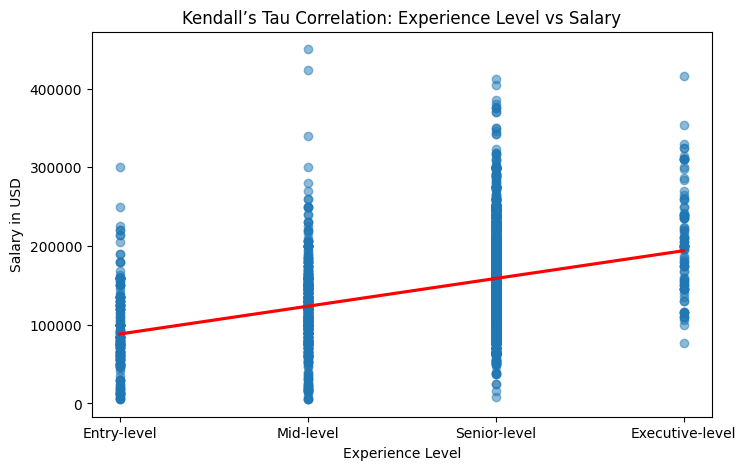

In [44]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df_filtered['exp_numeric'], y=df_filtered['salary_in_usd'],
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ci=None)

plt.xticks(ticks=[1, 2, 3, 4], labels=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])

plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Kendall’s Tau Correlation: Experience Level vs Salary')

plt.show()

In [45]:
# filter 4 top countries in asia
asia_4_countries = ['ID', 'JP', 'IN', 'SG']  

# flter avg salary from us and selected asia countries
us_salaries = df_filtered[df_filtered['company_location'] == 'US']['salary_in_usd']
asia_salaries = df_filtered[df_filtered['company_location'].isin(asia_4_countries)]['salary_in_usd']

# Perform an independent t-test (Welch's t-test assuming unequal variance)
t_stat, p_val = stats.ttest_ind(us_salaries, asia_salaries, equal_var=False)

# Print results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_val:.4f}')

# Define significance level
alpha = 0.05

# Hypothesis testing
if p_val < alpha:
    print('Reject H₀: There is a significant difference in average salary between the US and Asia.')
else:
    print('Fail to reject H₀: There is no significant difference in average salary between the US and Asia.')


T-statistic: 18.7807
P-value: 0.0000
Reject H₀: There is a significant difference in average salary between the US and Asia.


The T-statistic of 18.7807 and P-value of 0.000 indicate a highly significant difference in average salaries between US and Asia. Since the p-value is below than 0.05 we reject the null hypothesis, confirming that the salaries in these two regions are not equal.

US generally has a higher cost of living and stronger currency compared to many asian countries. Thats why US salary average was higher compared to the rest of countries. In contrast, Asian country may have lower salary standards due to lower living cost (compare to US) and different economic structure.

As we mentioned earlier, US has a more developed tech ecosystem, leading to higher demand for skilled professionals and more competitive salary. Many Asian countries are still growing their data science and AI industry, and companies may not ready to offering the same salaries to those in US.

# Conclusion

- Our t-test result show a significant differences in average salaries between US and Asia (p-value = 0.000). The US offers higher salaries compared to Asia region, likely due to industry maturity, higher demand, and a well-established data science market. However, higher salaries doesn't always translate to better financial unless we account for living cost.

- US jobs market is dominated by senior-level roles, which aligns with its competitive environment. Companies prefer hired experience professionals due to its industry's maturity and high demand for high-level decision-making.

- There is a correlation between salary and experiences level. Indicate by our spearmann correlation 0.38 and p-value = 0.000. This means that experiences does influences salary, but since the corrleation is 0.38, which is pretty low, it means that experiences not the only factor that influences salary increases.

- Singapore has the highest index cost of living. But the average salary are lower than US by high margin. This suggests that high expenses reduce the purchasing power of workers. Japan has a high cost of living but very low job posting in data science. Indonesia and India has a low cost of living and low average salary. But the job posting in India is bigger than the rest of Asia countries.

For companies:

    - Hiring in Asia offers cost advantages due to lower salaries and living cost compared to US. Making it a viable options for companies looking to expand talent pools.

    - US market remains highly competitive. Attracting top talent require competitive salaries and benefit.

    - The growth of data science in Asia presents an opportunity for companies to invest, especially as the demand for the data professional increases.